# Predicting the Survival of Titanic Passengers

## Introduction
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. Let's find out the factors which help to survive.

## Objectives

* <p>Explore the factors which decided the survival of passengers.</p>
* <p>predict the survival of passengers on Titanic using machine learning and deep learning.</p>

## Description of the Dataset
The dataset contains ten features and 891 passenger details. **Survived** is the target variable for the study.


<table style="border-collapse: collapse;font-size: 15px; width:800px;">
  <tr>
    <th style="background-color:#D3DBDD;">Variable Name </th>
    <th style="width:500px; background-color:#D3DBDD;">Description</th>
    <th style="background-color:#D3DBDD;">Type</th>
  </tr>
  <tr>
    <td>survival</td>
    <td>Did Survive the incident?</td>
    <td>Categoricol</td>
  </tr>
  <tr>
    <td>pclass </td>
    <td>Class of the ticket</td>
    <td>Categoricol</td>
  </tr>
  <tr>
    <td>sex </td>
    <td>Gender </td>
    <td>Categoricol</td>
  </tr>
  <tr>
    <td>Age </td>
    <td>Age of the passenger</td>
    <td>Numeric</td>
  </tr>
  <tr>
    <td>sibsp </td>
    <td>no of siblings / spouses aboard the Titanic </td>
    <td>Numeric</td>
  </tr>
  <tr>
    <td>parch</td>
    <td>no of parents / children aboard the Titanic</td>
    <td>Numeric</td>
  </tr>
  <tr>
    <td>ticket</td>
    <td>Unique ticket number</td>
    <td>Categoricol</td>
  </tr>
  <tr>
    <td>fare</td>
    <td>Passenger fare </td>
    <td>Numeric</td>
  </tr>
  <tr>
    <td>cabin</td>
    <td>cabin number </td>
    <td>Categoricol</td>
  </tr>
  <tr>
    <td>Embarked</td>
    <td>Port of Embarkation</td>
    <td>Categoricol</td>
  </tr>
</table>


In [42]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
%matplotlib inline

In [43]:
# Load the dataset
data = pd.read_csv("data/titanic.csv")
data.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


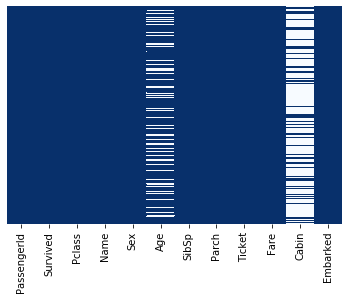

In [45]:
## checking missing values in the training set.
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="Blues_r");

There are some missing values in the dataset. So we need to remove or impute them.

In [46]:
#categorical variables and there categories.
categorical_cols= data.select_dtypes(include=['object'])
print(f'The dataset contains {len(categorical_cols.columns.tolist())} categorical columns')
for cols in categorical_cols.columns:
    print(cols,':', len(categorical_cols[cols].unique()),'labels')

The dataset contains 5 categorical columns
Name : 891 labels
Sex : 2 labels
Ticket : 681 labels
Cabin : 148 labels
Embarked : 4 labels


## Descriptive Analysis
some of the important results of descriptive analysis is shown below.

In [47]:
import plotly.graph_objects as go

night_colors = ['#D3DBDD',  'navy',  '#57A7F3']
labels = ['Survived', 'Not Survived']
values = [data['Survived'].value_counts()[1], data['Survived'].value_counts()[0]]

# Use `hole` to create a donut-like pie chart
fig=go.Figure(data=[go.Pie(labels=labels,values=values,hole=.3,pull=[0,0,0.06,0])])

fig.update_layout(
    title_text="Survival Status")
fig.update_traces(marker=dict(colors=night_colors))
fig.show()

In [48]:
import plotly.graph_objects as go

night_colors = ['#D3DBDD',  'navy',  '#57A7F3']
labels = [x for x in data.Embarked.value_counts().index]
values = data.Embarked.value_counts()

# Use `hole` to create a donut-like pie chart
fig=go.Figure(data=[go.Pie(labels=["Southampton","Cherbourg","Queenstown"],values=values,hole=.3,pull=[0,0,0.06,0])])

fig.update_layout(
    title_text="Port of embarkation")
fig.update_traces(marker=dict(colors=night_colors))
fig.show()

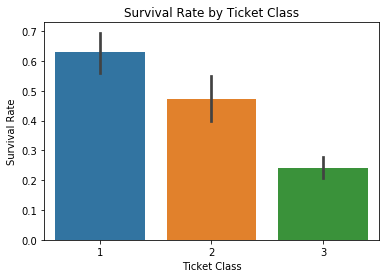

In [49]:
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Survival Rate')
plt.show()

The majority of the passenegers from southampton and least number of passengers from Queenstown.

In [50]:
labels = [x for x in data.Sex.value_counts().index]
values = data.Sex.value_counts()

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3,pull=[0.03, 0])])

fig.update_layout(
    title_text="Gender ")
fig.update_traces(marker=dict(colors=night_colors))
fig.show()

There were 64.8% male passengers on the ship which is significantly greater than female passengers.

In [51]:
import plotly.figure_factory as ff
from plotly.offline import iplot
age=data['Age'].dropna()
fig = ff.create_distplot([age],['Age'],bin_size=1,)
fig.update_traces()
fig.update_layout(
    title="Age Distribution",
)
iplot(fig, filename='Basic Distplot')

Age of the passengers are positively skewed and also there were some missing values in this variable.

In [52]:
fig = ff.create_distplot([data['Fare']],['Fare'],bin_size=10)
fig.update_traces()
fig.update_layout(
    title="Fare Distribution",
)
iplot(fig, filename='Basic Distplot')

The distribution of fare is also skewed. we can use log transformation if we want to noramlize these positively skewed distributions.  

**Note**: In Some machine learning algorithms, it is essential to have normalized feature. But as we use MLP Classofiers here, it does'nt matter to us.

In [53]:
data['Survived']=data['Survived'].astype('category')
data['Pclass']=data['Pclass'].astype('category')
data['SibSp']=data['SibSp'].astype('category')

In [54]:
import plotly.express as px

df = data.groupby(by=["Survived", "Sex"]).size().reset_index(name="counts")
px.bar(data_frame=df, x="Sex", y="counts", color="Survived", barmode="group",color_discrete_sequence =['#8FCBD8','#D3DBDD'],title="Survived vs Gender")

Out of all the survivers there were many females. this may due to the fact that higher priority given to save the children and women on the ship.

In [55]:

df = data.groupby(by=["Survived", "Pclass"]).size().reset_index(name="counts")
px.bar(data_frame=df, x="Pclass", y="counts", color="Survived", barmode="group",color_discrete_sequence =['#8FCBD8','#D3DBDD']
      ,title="Survived vs Ticket class")

This shows higher priority to the class 1 passengers. hence there are many survivars from class 1 while there are many who could not survive in class 3

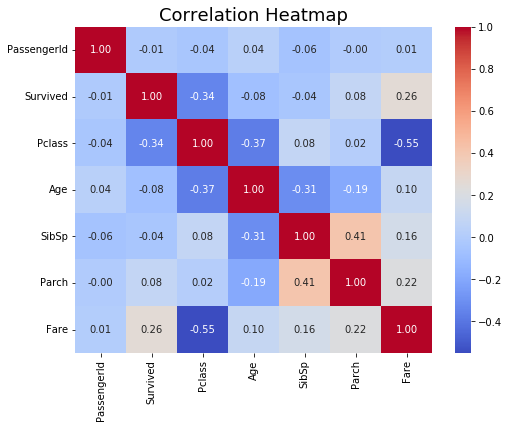

In [35]:

#  we had made a change in type of these features for other visualizations. 
data['Survived']=data['Survived'].astype('int')
data['Pclass']=data['Pclass'].astype('int')
data['SibSp']=data['SibSp'].astype('int')

def plot_correlation_heatmap(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f',
                xticklabels=corr.columns, yticklabels=corr.columns, ax=ax)
    ax.set_title('Correlation Heatmap', fontsize=18)
    plt.show()

plot_correlation_heatmap(data)

### Data Preprocessing

In [56]:
# Drop columns that are not relevant for the model
data = data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

# Fill missing values in Age and Embarked columns
data["Age"] = data["Age"].fillna(data["Age"].mean())
data["Embarked"] = data["Embarked"].fillna("S")

# Encode categorical variables using one-hot encoding
encoder = OneHotEncoder(drop="first")
data_encoded = pd.DataFrame(encoder.fit_transform(data.iloc[:,1:]).toarray(), columns=encoder.get_feature_names_out())

# Concatenate the encoded categorical variables with the numerical variables
data_final = pd.concat([data.iloc[:,0], data_encoded], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_final.iloc[:,1:], data_final.iloc[:,0], test_size=0.2, random_state=42)


In [57]:
print('size of train and test:')
X_train.shape, X_test.shape

size of train and test:


((712, 352), (179, 352))

### Modeling the data with Sklearn

Training model 1...
F1 score for model 1: 0.700
Confusion matrix for model 1:
[[88 17]
 [25 49]]

Training model 2...
F1 score for model 2: 0.701
Confusion matrix for model 2:
[[90 15]
 [26 48]]

Training model 3...
F1 score for model 3: 0.000
Confusion matrix for model 3:
[[105   0]
 [ 74   0]]

Training model 4...
F1 score for model 4: 0.792
Confusion matrix for model 4:
[[92 13]
 [17 57]]



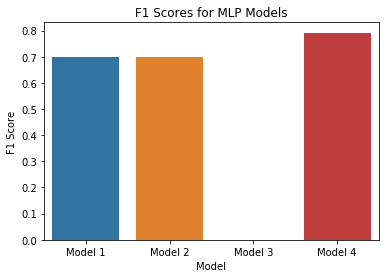

The best model is Model 4 with an F1 score of 0.792


In [38]:
# Define the different MLP classifier models to evaluate
models = [
    MLPClassifier(hidden_layer_sizes=(64,), max_iter=1000),
    MLPClassifier(hidden_layer_sizes=(64,32,), max_iter=1000),
    MLPClassifier(hidden_layer_sizes=(32, 16, 8), max_iter=1000, solver='sgd'),
    MLPClassifier(hidden_layer_sizes=(64, 32, 16,),max_iter=3000,
                  solver='sgd',learning_rate='adaptive'),
]

# Train and evaluate each model
f1_scores = []
for i, model in enumerate(models):
    print(f"Training model {i+1}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)
    print(f"F1 score for model {i+1}: {f1:.3f}")
    print(f"Confusion matrix for model {i+1}:")
    print(cm)
    print()

# Plot the F1 scores for each model
sns.barplot(x=["Model 1", "Model 2", "Model 3", "Model 4"], y=f1_scores)
plt.title("F1 Scores for MLP Models")
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.show()

# Find the best model based on the F1 score
best_model_idx = np.argmax(f1_scores)
best_model = models[best_model_idx]
print(
    f"The best model is Model {best_model_idx+1} with an F1 score of {f1_scores[best_model_idx]:.3f}"
)


### Modeling with Tensorflow

In [59]:
# Train and evaluate each model
results = []

# Define different model configurations
configs = [
    {"name": "1-L (64) N", "layers": [64]},
    {"name": "2-L-(64, 32)-N", "layers": [64, 32]},
    {"name": "3L-(64, 32, 16)-N", "layers": [64, 32, 16]},
    {"name": "4L-(64, 32, 16, 8)-N", "layers": [64, 32, 16, 8]}
]

# Define different optimizers and learning rates
optimizers = [
    {"name": "Adam", "optimizer": keras.optimizers.Adam(learning_rate=0.001)},
    {"name": "Adam", "optimizer": keras.optimizers.Adam(learning_rate=0.01)},
    {"name": "RMSprop", "optimizer": keras.optimizers.RMSprop(learning_rate=0.001)},
    {"name": "RMSprop", "optimizer": keras.optimizers.RMSprop(learning_rate=0.01)},
    {"name": "SGD", "optimizer": keras.optimizers.SGD(learning_rate=0.001)},
    {"name": "SGD", "optimizer": keras.optimizers.SGD(learning_rate=0.01)}    
]

# Train and evaluate each model
results = []
for config in configs:
    for opt in optimizers:
        model = Sequential()
        for i, layer in enumerate(config["layers"]):
            if i == 0:
                model.add(Dense(layer, activation="relu", input_shape=(X_train.shape[1],)))
            model.add(Dense(layer, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer=opt["optimizer"], loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
        y_pred = model.predict(X_test)
        y_pred = np.where(y_pred > 0.5, 1, 0)
        # Compute the f1 score, accuracy score, and confusion matrix
        
        f1_score = metrics.f1_score(y_test, y_pred)
        accuracy_score = metrics.accuracy_score(y_test, y_pred)
        confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
        precision_keras = metrics.precision_score(y_test, y_pred, average='weighted')
        recall_keras = metrics.recall_score(y_test, y_pred, average='weighted')

        results.append({
            "model": config["name"],
            "optimizer": opt["name"],
            "learning_rate": opt["optimizer"].get_config()["learning_rate"],
            "accuracy": accuracy_score,
            "f1_score":f1_score,
            "neurons": config["layers"]
        })
        
df_results = pd.DataFrame(results)
df_results

/home/mahtab/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/mahtab/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/mahtab/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/mahtab/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter

,model,optimizer,learning_rate,accuracy,f1_score,neurons
0,1-L (64) N,Adam,0.001,0.737430,0.680272,[64]
1,1-L (64) N,Adam,0.010,0.743017,0.671429,[64]
2,1-L (64) N,RMSprop,0.001,0.698324,0.630137,[64]
3,1-L (64) N,RMSprop,0.010,0.726257,0.662069,[64]
4,1-L (64) N,SGD,0.001,0.586592,0.000000,[64]
5,1-L (64) N,SGD,0.010,0.798883,0.746479,[64]
6,"2-L-(64, 32)-N",Adam,0.001,0.743017,0.676056,"[64, 32]"
7,"2-L-(64, 32)-N",Adam,0.010,0.748603,0.689655,"[64, 32]"
8,"2-L-(64, 32)-N",RMSprop,0.001,0.715084,0.627737,"[64, 32]"
9,"2-L-(64, 32)-N",RMSprop,0.010,0.776536,0.705882,"[64, 32]"


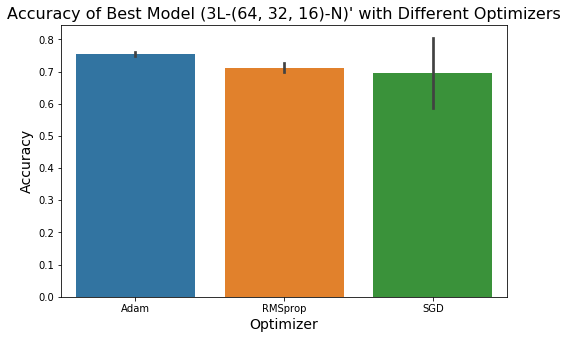

In [76]:
# Filter results by best model
best_model = df_results.loc[df_results['model'] == '3L-(64, 32, 16)-N']

# Set up plot
fig, ax = plt.subplots(figsize=(8,5))

# Plot results
sns.barplot(x="optimizer", y="accuracy", data=best_model, ax=ax)

# Set plot title and labels
ax.set_title(f"Accuracy of Best Model (3L-(64, 32, 16)-N)' with Different Optimizers", fontsize=16)
ax.set_xlabel("Optimizer", fontsize=14)
ax.set_ylabel("Accuracy", fontsize=14)

plt.show()


In [73]:
def evaluate_model(y_test, y_pred):
    """Evaluate the performance of a binary classification model by calculating various metrics.

    Parameters:
    -----------
    y_test : array-like of shape (n_samples,)
        True binary labels for the test set.
    y_pred : array-like of shape (n_samples,)
        Predicted binary labels for the test set.

    Returns:
    --------
    None
    """
    # Plot the confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average='weighted')
    recall = metrics.recall_score(y_test, y_pred, average='weighted')
    f1_score = metrics.f1_score(y_test, y_pred)
    accuracy_score = metrics.accuracy_score(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    print(f'f1 score: {f1_score:.4f}\
    \nprecision: {precision:.4f}\
    \nrecall: {recall:.4f}\
    \naccuracy: {accuracy_score}')
    
   
def create_model(layers, opt):
    """
    Creates a sequential neural network model with specified hidden layers and optimization algorithm, and trains it on
    the training data. The trained model is then used to make binary predictions for the input test data.

    Parameters:
    layers (list): A list of integers that specifies the number of nodes in each hidden layer of the neural network.
    opt (str): A string that specifies the optimization algorithm to use when training the model.

    Returns:
    tuple: A tuple containing the trained model and binary predictions for the test data.
    """
    model = Sequential()
    for i, layer in enumerate(layers):
        if i == 0:
            model.add(Dense(layer, activation="relu", input_shape=(X_train.shape[1],)))
        model.add(Dense(layer, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    y_pred = model.predict(X_test)
    y_pred = np.where(y_pred > 0.5, 1, 0)
    return model, y_pred



In [74]:
_ , y_pred = create_model([64,32,16], SGD(learning_rate=0.01))

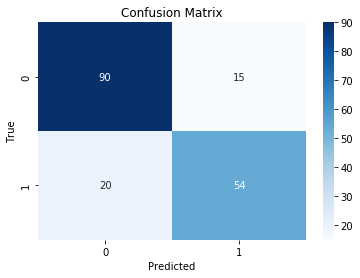

f1 score: 0.7552    
precision: 0.8035    
recall: 0.8045    
accuracy: 0.8044692737430168


In [75]:
evaluate_model(y_test, y_pred)